# Encoding Categorical Variables

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Category Encoders

A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques.

https://contrib.scikit-learn.org/category_encoders/

Install: `category_encoders`

<img src="https://feature-engine.trainindata.com/en/latest/_images/categoricalSummary.png">

## Creating binary variables through one-hot encoding

- training decision trees
- determining the importance of each category within a variable

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [5]:
data = pd.read_csv('data/creditApprovalUCI.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3, random_state=0)

In [7]:
X_train['A4'].unique()

array(['u', 'y', nan, 'l'], dtype=object)

In [8]:
encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)

In [9]:
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
encoder.fit(X_train[vars_categorical])

OneHotEncoder(drop='first', sparse=False)

In [10]:
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])

In [11]:
X_train_enc

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 1.]])

## Performing one-hot encoding of frequent categories

In [12]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer

In [13]:
data = pd.read_csv('data/creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1), # predictors
    data['A16'], # target
    test_size=0.3, # percentage of observations in test set
    random_state=0) # seed to ensure reproducibility


imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [14]:
X_train['A6'].unique()

array(['c', 'q', 'w', 'ff', 'm', 'i', 'e', 'cc', 'x', 'd', 'k', 'j',
       'Missing', 'aa', 'r'], dtype=object)

In [15]:
X_train['A6'].value_counts().sort_values(ascending=False).head(5)

c     93
q     56
w     48
i     41
ff    38
Name: A6, dtype: int64

In [16]:
ohe_enc = OneHotEncoder(top_categories=5, variables=['A6', 'A7'], drop_last=False)

In [17]:
ohe_enc.fit(X_train)

OneHotEncoder(top_categories=5, variables=['A6', 'A7'])

In [18]:
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [19]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,...,A6_c,A6_q,A6_w,A6_i,A6_ff,A7_v,A7_h,A7_ff,A7_bb,A7_z
596,a,46.08,3.000,u,g,2.375,t,t,8,t,...,1,0,0,0,0,1,0,0,0,0
303,a,15.92,2.875,u,g,0.085,f,f,0,f,...,0,1,0,0,0,1,0,0,0,0
204,b,36.33,2.125,y,p,0.085,t,t,1,f,...,0,0,1,0,0,1,0,0,0,0
351,b,22.17,0.585,y,p,0.000,f,f,0,f,...,0,0,0,0,1,0,0,1,0,0
118,b,57.83,7.040,u,g,14.000,t,t,6,t,...,0,0,0,0,0,1,0,0,0,0


In [20]:
ohe_enc.encoder_dict_

{'A6': ['c', 'q', 'w', 'i', 'ff'], 'A7': ['v', 'h', 'ff', 'bb', 'z']}

## Replacing categories with ordinal numbers

- better suited for nonlinear machine learning models

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
data = pd.read_csv('data/creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, random_state=0)

In [26]:
data['A6'].nunique()

14

In [27]:
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

le = OrdinalEncoder()

In [28]:
le.fit(X_train[vars_categorical])

OrdinalEncoder()

In [29]:
X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])

In [36]:
X_train_enc.shape

(483, 9)

## Replacing categories with counts or frequency of observations

In [37]:
data = pd.read_csv('data/creditApprovalUCI.csv')

In [38]:
data.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, random_state=0)

imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [40]:
from feature_engine.encoding import CountFrequencyEncoder

count_enc = CountFrequencyEncoder(encoding_method='count', variables=None)

In [41]:
count_enc.fit(X_train)

CountFrequencyEncoder()

In [42]:
count_enc.encoder_dict_

{'A1': {'b': 335, 'a': 144, 'Missing': 4},
 'A4': {'u': 363, 'y': 115, 'Missing': 4, 'l': 1},
 'A5': {'g': 363, 'p': 115, 'Missing': 4, 'gg': 1},
 'A6': {'c': 93,
  'q': 56,
  'w': 48,
  'i': 41,
  'ff': 38,
  'k': 38,
  'aa': 34,
  'cc': 30,
  'm': 26,
  'x': 24,
  'e': 21,
  'd': 21,
  'j': 8,
  'Missing': 4,
  'r': 1},
 'A7': {'v': 277,
  'h': 101,
  'ff': 41,
  'bb': 39,
  'z': 7,
  'dd': 5,
  'j': 5,
  'Missing': 4,
  'n': 3,
  'o': 1},
 'A9': {'t': 222, 'f': 193, 'Missing': 68},
 'A10': {'f': 230, 't': 185, 'Missing': 68},
 'A12': {'f': 263, 't': 220},
 'A13': {'g': 441, 's': 38, 'p': 4}}

In [43]:
X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)

In [44]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,144,46.08,3.000,363,363,93,277,2.375,222,185,8,220,441,396.0,4159
303,144,15.92,2.875,363,363,56,277,0.085,193,230,0,263,441,120.0,0
204,335,36.33,2.125,115,115,48,277,0.085,222,185,1,263,441,50.0,1187
351,335,22.17,0.585,115,115,38,41,0.000,193,230,0,263,441,100.0,0
118,335,57.83,7.040,363,363,26,277,14.000,222,185,6,220,441,360.0,1332


## Encoding with integers in an ordered manner

In [57]:
data = pd.read_csv('data/creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data, data['A16'], test_size=0.3, random_state=0)

imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [58]:
X_train["A7"].unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'Missing', 'n', 'o'],
      dtype=object)

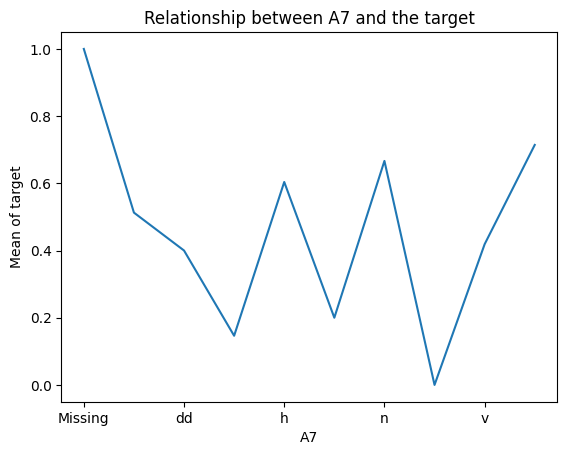

In [59]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [60]:
X_train.groupby(['A7'])['A16'].mean()

A7
Missing    1.000000
bb         0.512821
dd         0.400000
ff         0.146341
h          0.603960
j          0.200000
n          0.666667
o          0.000000
v          0.418773
z          0.714286
Name: A16, dtype: float64

In [61]:
X_train.groupby(['A7'])['A16'].mean().sort_values()

A7
o          0.000000
ff         0.146341
j          0.200000
dd         0.400000
v          0.418773
bb         0.512821
h          0.603960
n          0.666667
z          0.714286
Missing    1.000000
Name: A16, dtype: float64

In [62]:
ordered_labels = X_train.groupby(['A7'])['A16'].mean().sort_values().index
ordered_labels

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')

In [63]:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'o': 0,
 'ff': 1,
 'j': 2,
 'dd': 3,
 'v': 4,
 'bb': 5,
 'h': 6,
 'n': 7,
 'z': 8,
 'Missing': 9}

In [64]:
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

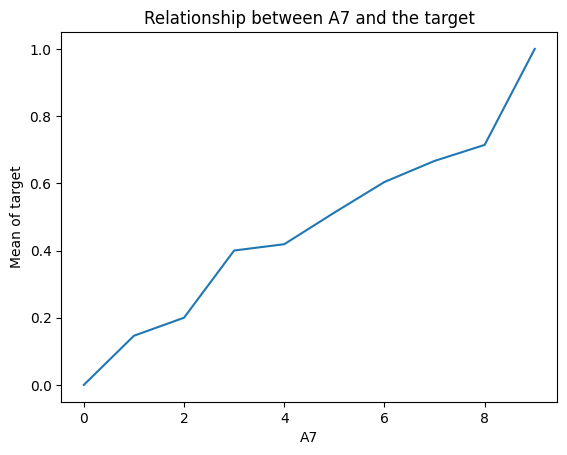

In [65]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3, random_state=0)


imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [70]:
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(encoding_method='ordered', variables=None)

In [71]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [72]:
ordinal_enc.encoder_dict_

{'A1': {'b': 0, 'a': 1, 'Missing': 2},
 'A4': {'y': 0, 'u': 1, 'Missing': 2, 'l': 3},
 'A5': {'p': 0, 'g': 1, 'Missing': 2, 'gg': 3},
 'A6': {'ff': 0,
  'd': 1,
  'j': 2,
  'i': 3,
  'k': 4,
  'm': 5,
  'aa': 6,
  'c': 7,
  'w': 8,
  'e': 9,
  'q': 10,
  'cc': 11,
  'x': 12,
  'Missing': 13,
  'r': 14},
 'A7': {'o': 0,
  'ff': 1,
  'j': 2,
  'dd': 3,
  'v': 4,
  'bb': 5,
  'h': 6,
  'n': 7,
  'z': 8,
  'Missing': 9},
 'A9': {'f': 0, 'Missing': 1, 't': 2},
 'A10': {'f': 0, 'Missing': 1, 't': 2},
 'A12': {'t': 0, 'f': 1},
 'A13': {'s': 0, 'g': 1, 'p': 2}}

In [73]:
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [74]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,1,45.83,10.50,1,1,10,4,5.000,2,2,7,0,1,0.0,0
586,0,64.08,20.00,1,1,12,6,17.500,2,2,9,0,1,0.0,1000
140,1,31.25,3.75,1,1,11,6,0.625,2,2,9,0,1,181.0,0
492,0,39.25,9.50,1,1,5,4,6.500,2,2,14,1,1,240.0,4607
350,1,26.17,2.00,1,1,2,2,0.000,0,0,0,0,1,276.0,1


## Encoding with the mean of the target

In [75]:
data = pd.read_csv('data/creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data, data['A16'], test_size=0.3, random_state=0)

imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [76]:
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder(variables=None)

In [77]:
mean_enc.fit(X_train, y_train)

MeanEncoder()

In [78]:
X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)

## Grouping rare or infrequent categories

In [79]:
from feature_engine.encoding import RareLabelEncoder

In [80]:
data = pd.read_csv('data/creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, random_state=0)

imputer = CategoricalImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [83]:
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=2)

In [84]:
rare_encoder.fit(X_train)

/home/administrator/python-analitika-2-public/.venv/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:199: UserWarning: The number of unique categories for variable A12 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


RareLabelEncoder(n_categories=2)

In [85]:
X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)